In [1]:
import os
import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import helpers

In [3]:
merged_metadata, relatedness, genotypes_array, mapping_info = helpers.load_data()

In [4]:
# Step 0: Pre-process data
normalized_matrix, overlap_counts = helpers.preprocess_data_matrix(genotypes_array)

Loading previously computed non-missing overlap matrix...


In [5]:
# Fit PCA model on unrelated samples
filters = ["filter_pca_outlier", "hard_filtered", "filter_contaminated"]
_filtered_indices = merged_metadata[merged_metadata[filters].any(axis=1)].index
filtered_indices = ~merged_metadata.index.isin(_filtered_indices)
related_indices = ~merged_metadata['filter_king_related'].values #np.ones(shape=genotypes_array.shape[0], dtype=bool)

to_fit_on = related_indices & filtered_indices
to_transform_on = (~related_indices) & filtered_indices

Running PHATE on 4094 observations and 50 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.35 seconds.
  Calculating affinities...
  Calculated affinities in 0.02 seconds.
Calculated graph and diffusion operator in 0.37 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.18 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.46 seconds.
Calculated landmark operator in 2.38 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.99 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.08 seconds.


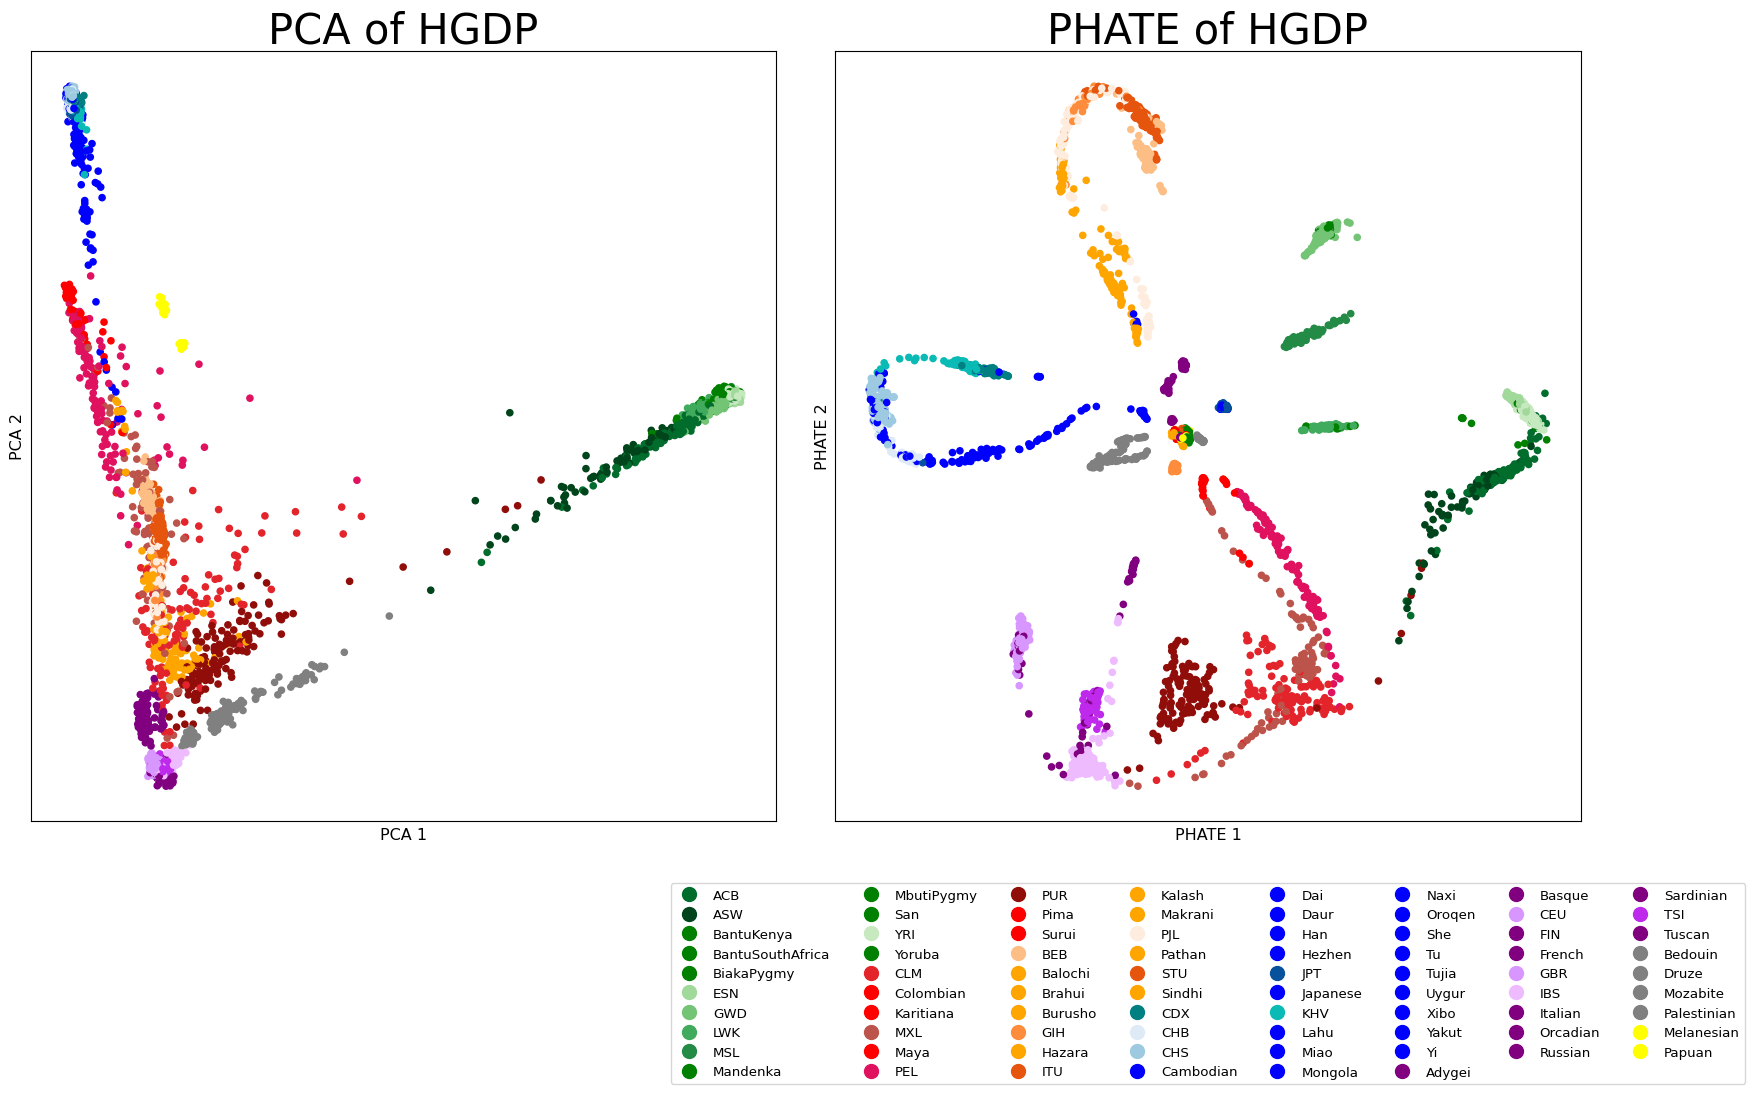

In [6]:
pca_emb, pca_obj = helpers.plot_pca_phate_data_matrix(normalized_matrix,
                                                      to_fit_on,
                                                      to_transform_on,
                                                      mapping_info[1],
                                                      merged_metadata['Population'].values,
                                                      fit_phate_on_both_sets=True)

In [7]:
# Step 1: Compute Kernel Matrix
gsm = helpers.compute_kernel_matrix(normalized_matrix, 
                            overlap_counts, 
                            approx='random_projection',
                            scale_by_overlap=True)   

Running PHATE on 4094 observations and 50 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.56 seconds.
  Calculating affinities...
  Calculated affinities in 0.02 seconds.
Calculated graph and diffusion operator in 0.59 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.21 seconds.
  Calculating KMeans...
  Calculated KMeans in 4.43 seconds.
Calculated landmark operator in 5.39 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.96 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.02 seconds.


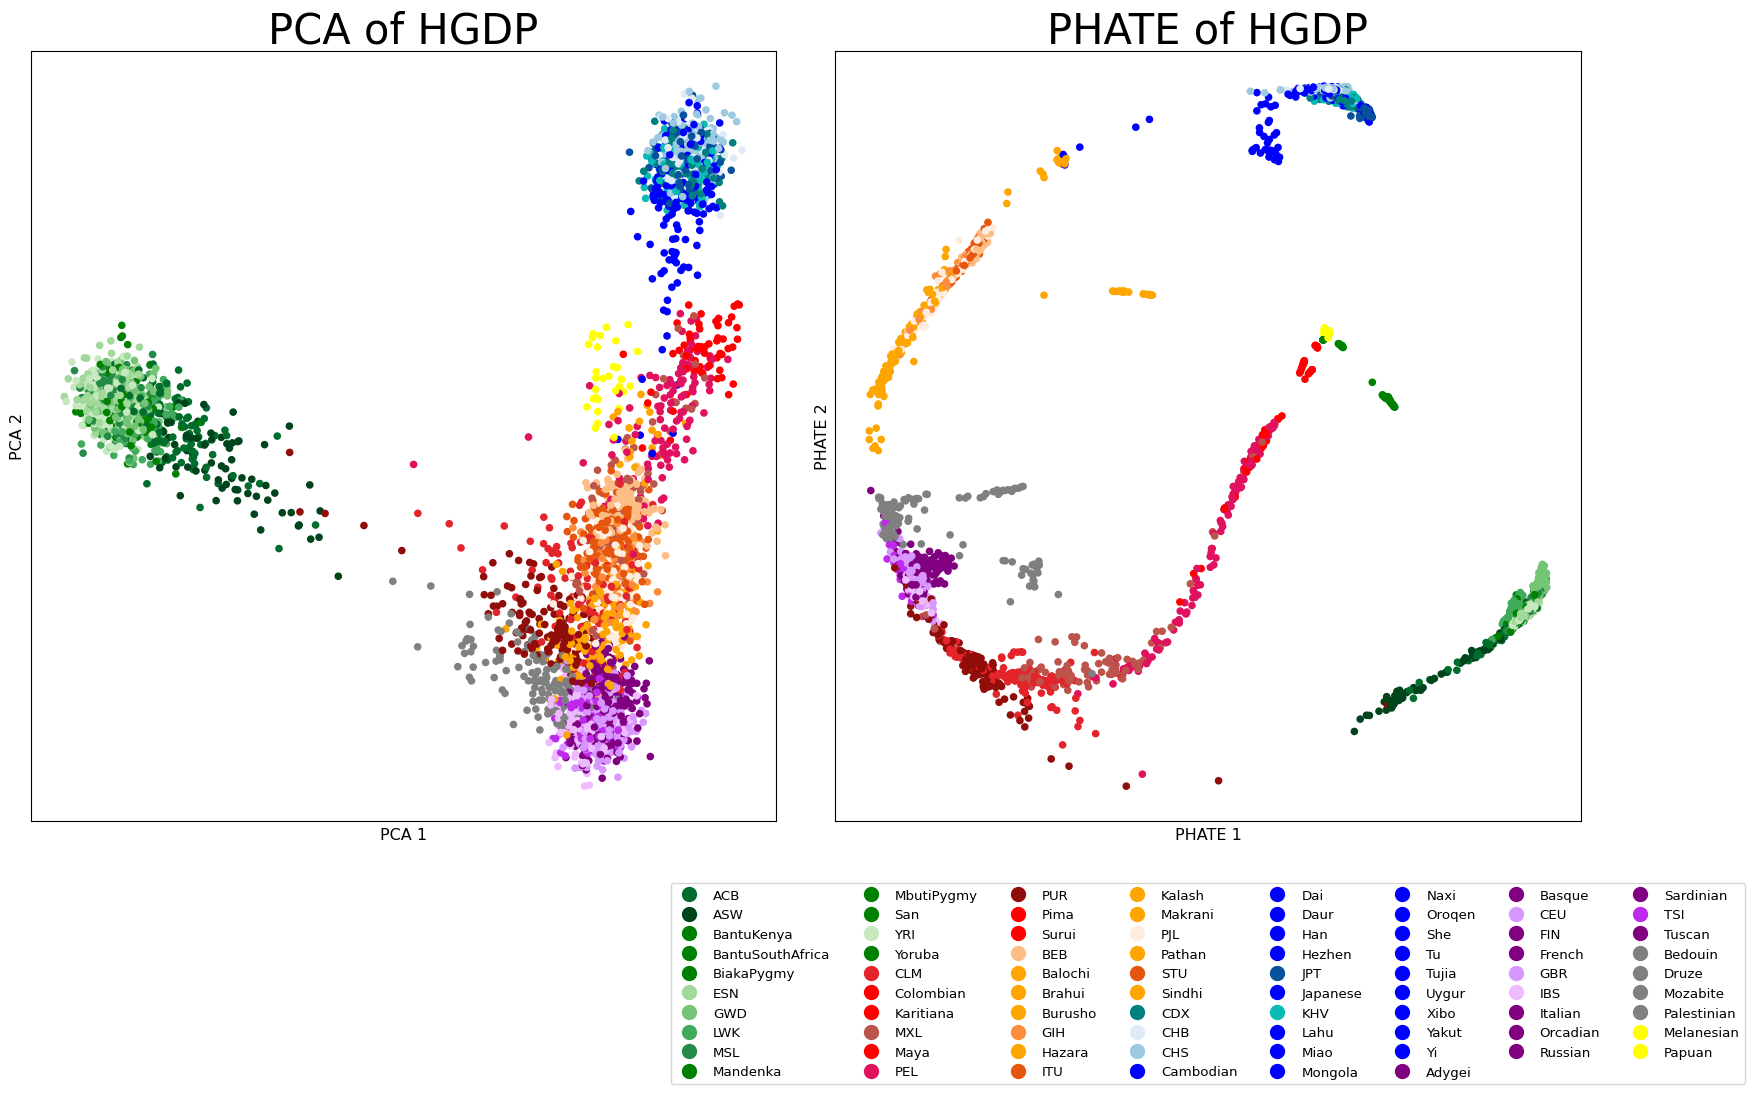

In [8]:
pca_emb_kernel, _ = helpers.plot_pca_phate_kernel_matrix(gsm,
                                                         to_fit_on,
                                                         to_transform_on,
                                                         mapping_info[1],
                                                         merged_metadata['Population'].values,
                                                         fit_phate_on_both_sets=True)

Running PHATE on 4094 observations and 50 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.37 seconds.
  Calculating affinities...
  Calculated affinities in 0.02 seconds.
Calculated graph and diffusion operator in 0.40 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.18 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.24 seconds.
Calculated landmark operator in 2.23 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.96 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.00 seconds.


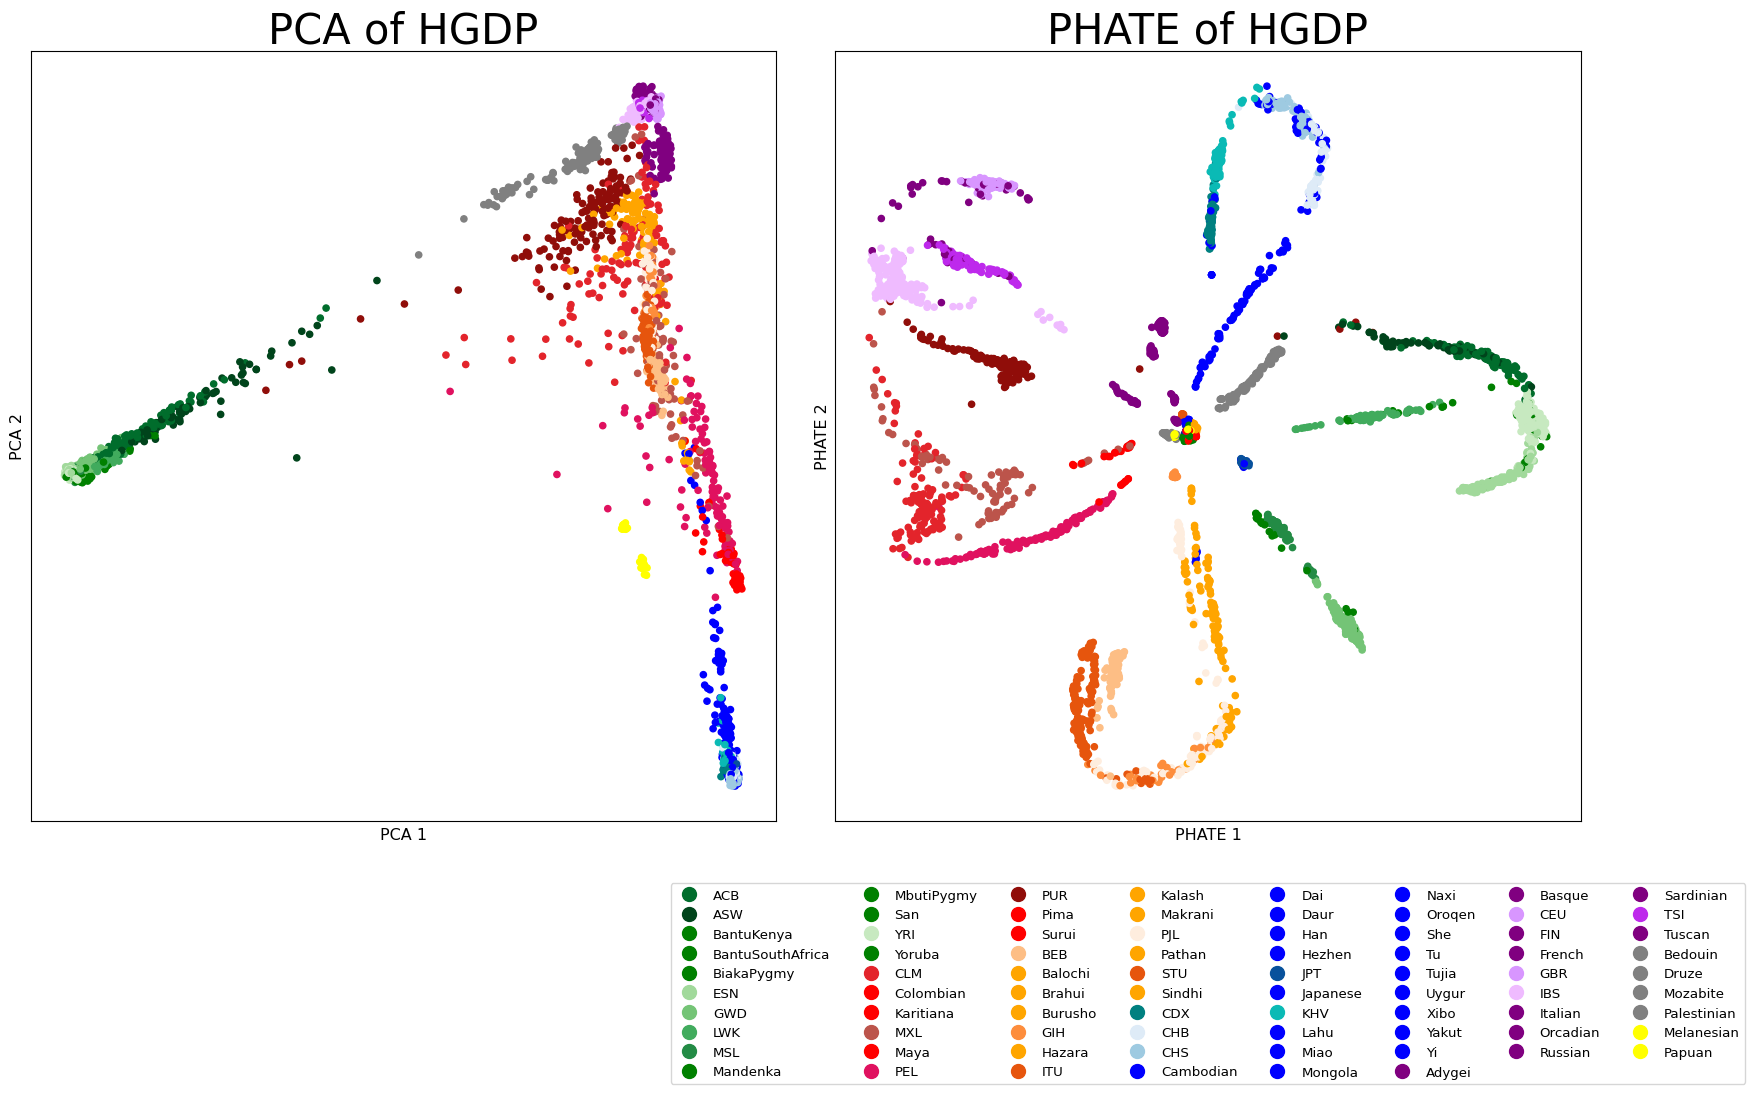

In [9]:
pca_emb_hail,pca_obj_hail = helpers.plot_pca_phate_hail('/lustre06/project/6065672/shared/MattDataSharing/1KGP+HGDP/V4/pca_scores_hailcomputed.csv',
                                                        merged_metadata,
                                                        to_fit_on,
                                                        to_transform_on,
                                                        mapping_info[1],
                                                        merged_metadata['Population'].values,
                                                        fit_phate_on_both_sets=True)

Running PHATE on 3400 observations and 50 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.31 seconds.
  Calculating affinities...
  Calculated affinities in 0.02 seconds.
Calculated graph and diffusion operator in 0.33 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.14 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.20 seconds.
Calculated landmark operator in 2.05 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.92 seconds.
Calculating metric MDS...
Calculated metric MDS in 3.84 seconds.
Calculating KNN search...
Calculated KNN search in 0.06 seconds.
Calculating affinities...


/lustre06/project/6065672/sciclun4/Envs/phate_env/lib/python3.11/site-packages/phate/phate.py:884: RuntimeWarning: Pre-fit PHATE should not be used to transform a new data matrix. Please fit PHATE to the new data by running 'fit' with the new data.
  warnings.warn(


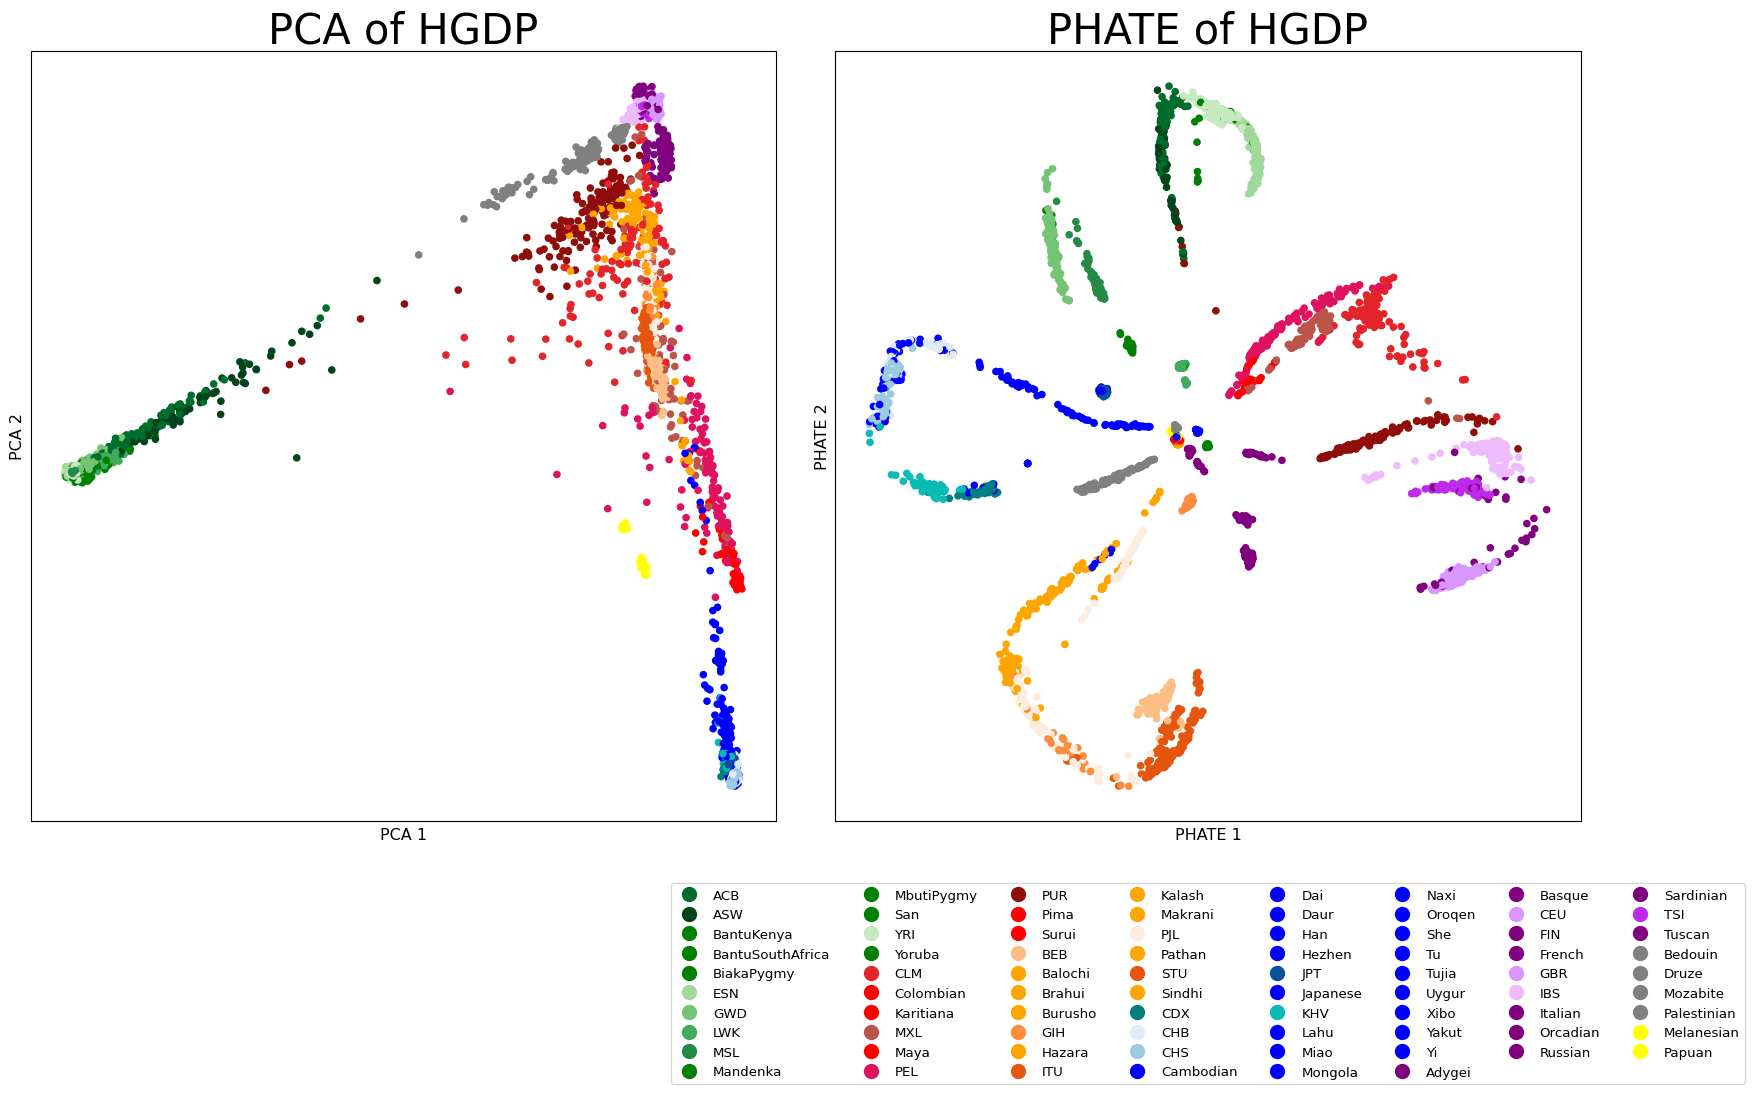

In [10]:
pca_emb_hail,pca_obj_hail = helpers.plot_pca_phate_hail('/lustre06/project/6065672/shared/MattDataSharing/1KGP+HGDP/V4/pca_scores_hailcomputed.csv',
                                                        merged_metadata,
                                                        to_fit_on,
                                                        to_transform_on,
                                                        mapping_info[1],
                                                        merged_metadata['Population'].values,
                                                        fit_phate_on_both_sets=False)

In [11]:
## Plot Relatedness matrix
# Make same size as gsm (fill empty values as 0)
king_mat_filters = ["hard_filtered", "filter_contaminated"]
_king_mat_filtered_indices = merged_metadata[merged_metadata[king_mat_filters].any(axis=1)].index
king_mat_filtered_indices = ~merged_metadata.index.isin(_king_mat_filtered_indices)

relatedness_reindex = relatedness.loc[merged_metadata.index[king_mat_filtered_indices], 
                                      merged_metadata.index[king_mat_filtered_indices]]

relatedness_reindex = relatedness_reindex.values.clip(0)**(1/5)

relatedness_full_mat = np.zeros_like(gsm)
relatedness_full_mat[np.ix_(king_mat_filtered_indices, 
                            king_mat_filtered_indices)] = relatedness_reindex

Running PHATE on 4094 observations and 50 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.72 seconds.
  Calculating affinities...


/lustre06/project/6065672/sciclun4/Envs/phate_env/lib/python3.11/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 4620 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


  Calculated affinities in 0.64 seconds.
Calculated graph and diffusion operator in 1.38 seconds.
Calculating landmark operator...
  Calculating SVD...


/lustre06/project/6065672/sciclun4/Envs/phate_env/lib/python3.11/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))


  Calculated SVD in 0.56 seconds.
  Calculating KMeans...
  Calculated KMeans in 2.06 seconds.
Calculated landmark operator in 3.43 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.91 seconds.
Calculating metric MDS...
Calculated metric MDS in 3.81 seconds.


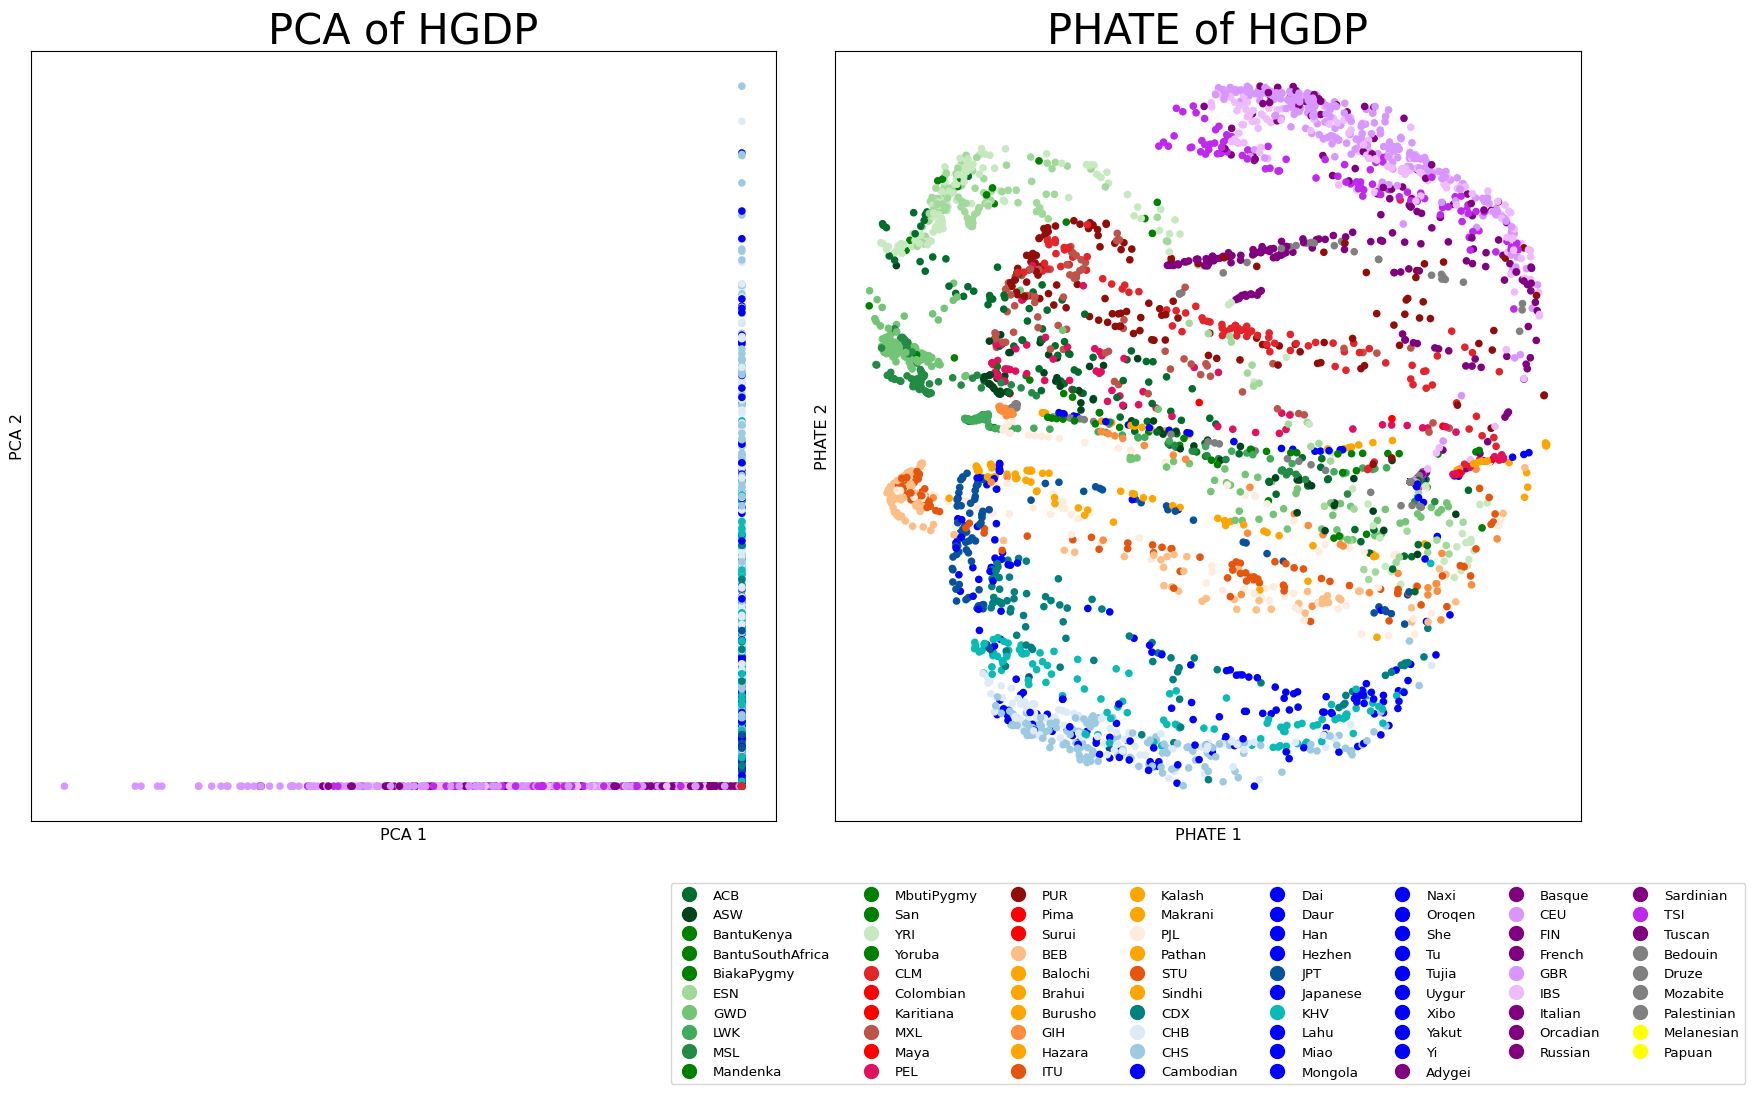

In [12]:
pca_emb_kernel, _ = helpers.plot_pca_phate_kernel_matrix(relatedness_full_mat,
                                                         to_fit_on,
                                                         to_transform_on,
                                                         mapping_info[1],
                                                         merged_metadata['Population'].values,
                                                         fit_phate_on_both_sets=True)

Calculating PHATE...
  Running PHATE on precomputed affinity matrix with 4117 observations.
  Calculating graph and diffusion operator...
  Calculated graph and diffusion operator in 0.26 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.62 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.56 seconds.
  Calculated landmark operator in 3.98 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.95 seconds.
  Calculating metric MDS...
    Using SMACOF because SGD returned NaN


/lustre06/project/6065672/sciclun4/Envs/phate_env/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 8.75 seconds.
Calculated PHATE in 13.95 seconds.


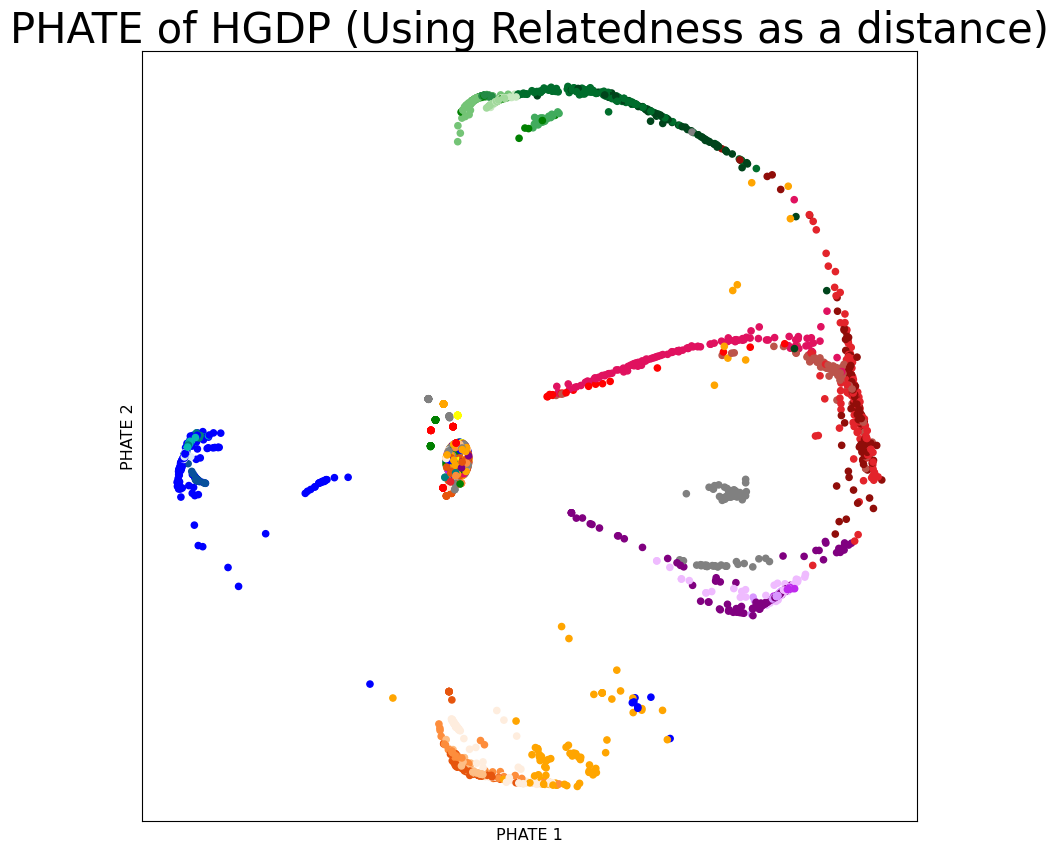

In [16]:
# Do manually (using precomputed affinity)
import phate
import scprep

phate_operator = phate.PHATE(random_state=42, knn=5, t=5, knn_dist='precomputed_affinity')
phate_emb = phate_operator.fit_transform(relatedness_full_mat[king_mat_filtered_indices][:,king_mat_filtered_indices])

fig, ax = plt.subplots(figsize=(10, 10), gridspec_kw={'wspace': 0.08})

# PCA
scprep.plot.scatter2d(phate_emb, 
                      s=20, 
                      cmap=mapping_info[1], 
                      ax=ax,
                      c=merged_metadata.loc[king_mat_filtered_indices]['Population'].values, 
                      xticks=False, 
                      yticks=False,
                      legend=True, 
                      legend_loc='lower center', 
                      legend_anchor=(0.5, -0.35), 
                      legend_ncol=8,
                      label_prefix="PHATE ", 
                      fontsize=8)
ax.set_title("PHATE of HGDP (Using Relatedness as a distance)", fontsize=30)
ax.get_legend().remove()

### Is random projector a lowpass filter ?

Running PHATE on 4094 observations and 50 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.75 seconds.
  Calculating affinities...
  Calculated affinities in 0.09 seconds.
Calculated graph and diffusion operator in 0.84 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.23 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.50 seconds.
Calculated landmark operator in 2.51 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 1.00 seconds.
Calculating metric MDS...
Calculated metric MDS in 4.17 seconds.
Running PHATE on 4094 observations and 50 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.75 seconds.
  Calculating affinities...
  Calculated affinities in 0.05 seconds.
Calculated graph and diffusion operator in 0.81 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in

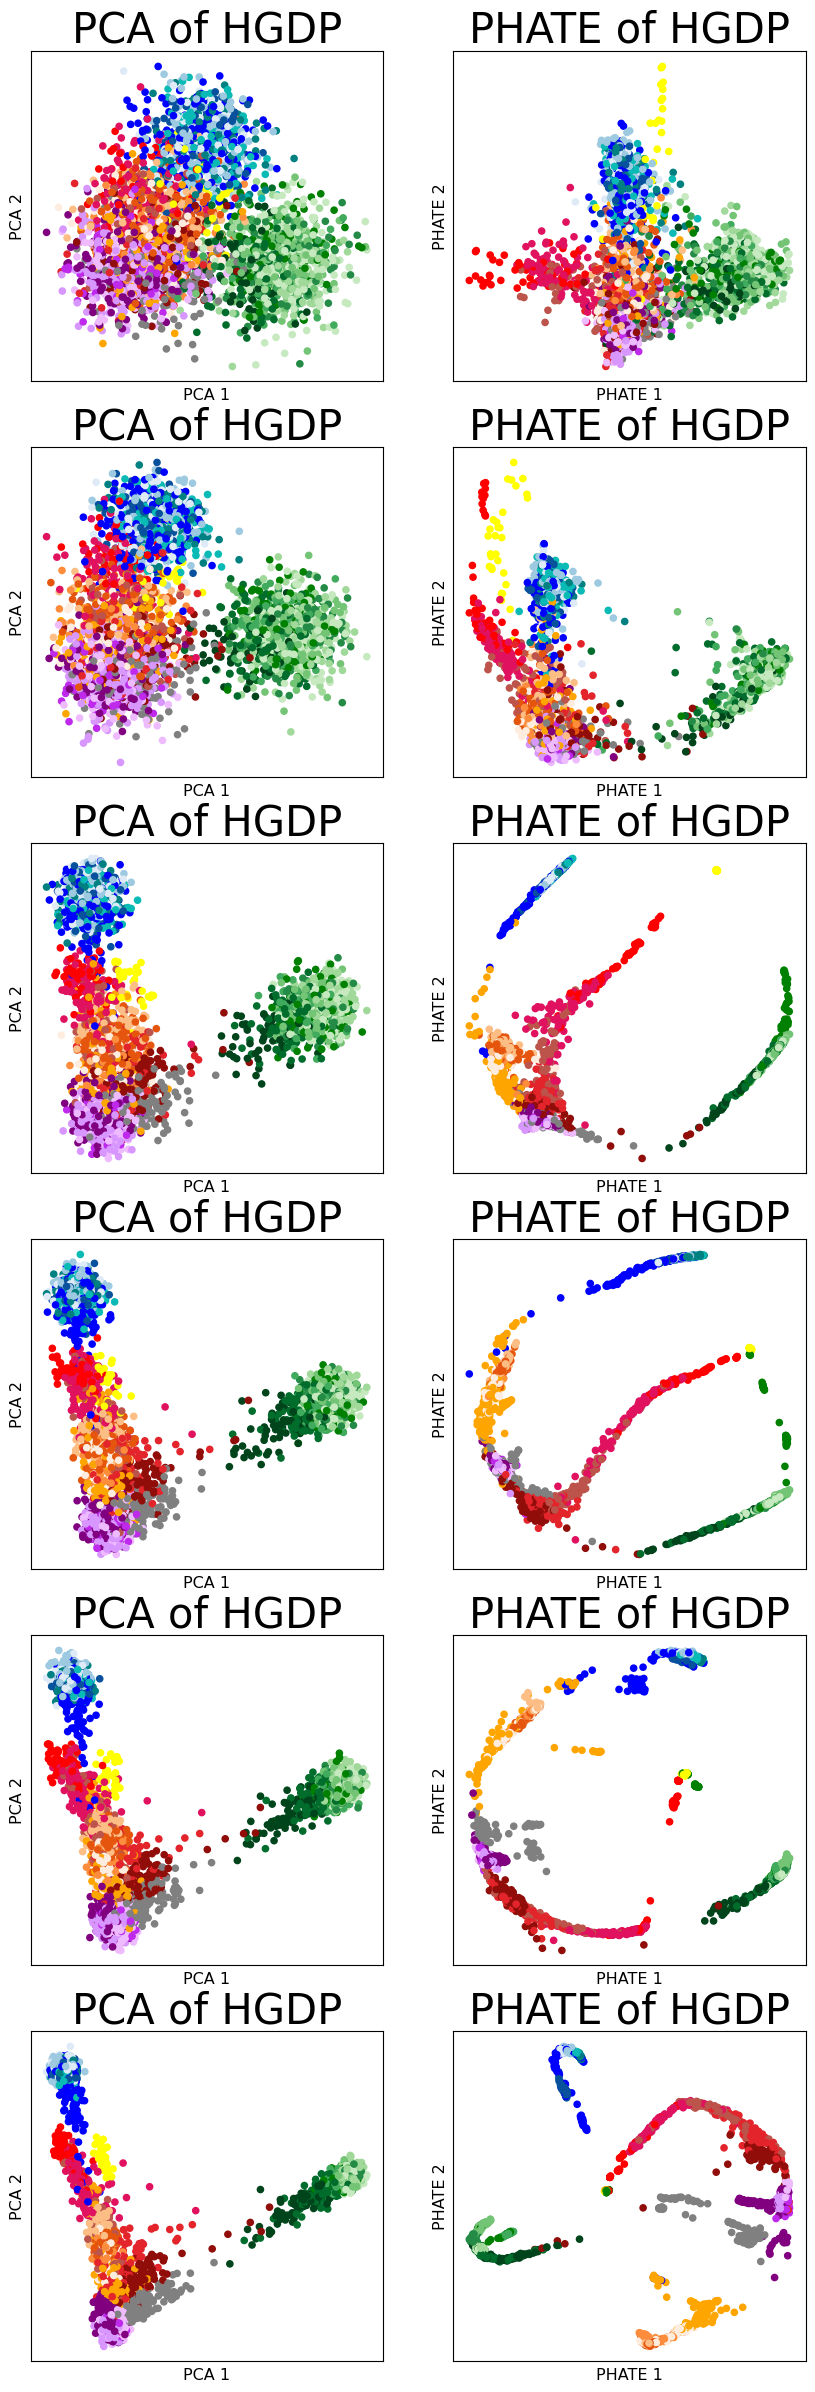

In [17]:
from sklearn.random_projection import GaussianRandomProjection

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10, 5*6))
for i, n_components in enumerate([50, 100, 500, 1000, 2000, 5000]):
    projector = GaussianRandomProjection(n_components=n_components, random_state=42)
    reduced_genotype_matrix = projector.fit_transform(normalized_matrix)
    pca_emb, pca_obj = helpers.plot_pca_phate_data_matrix(reduced_genotype_matrix,
                                                          to_fit_on,
                                                          to_transform_on,
                                                          mapping_info[1],
                                                          merged_metadata['Population'].values,
                                                          fit_phate_on_both_sets=True,
                                                          ax=ax[i])

<Axes: xlabel='Random Gaussian Projection 1', ylabel='Random Gaussian Projection 2'>

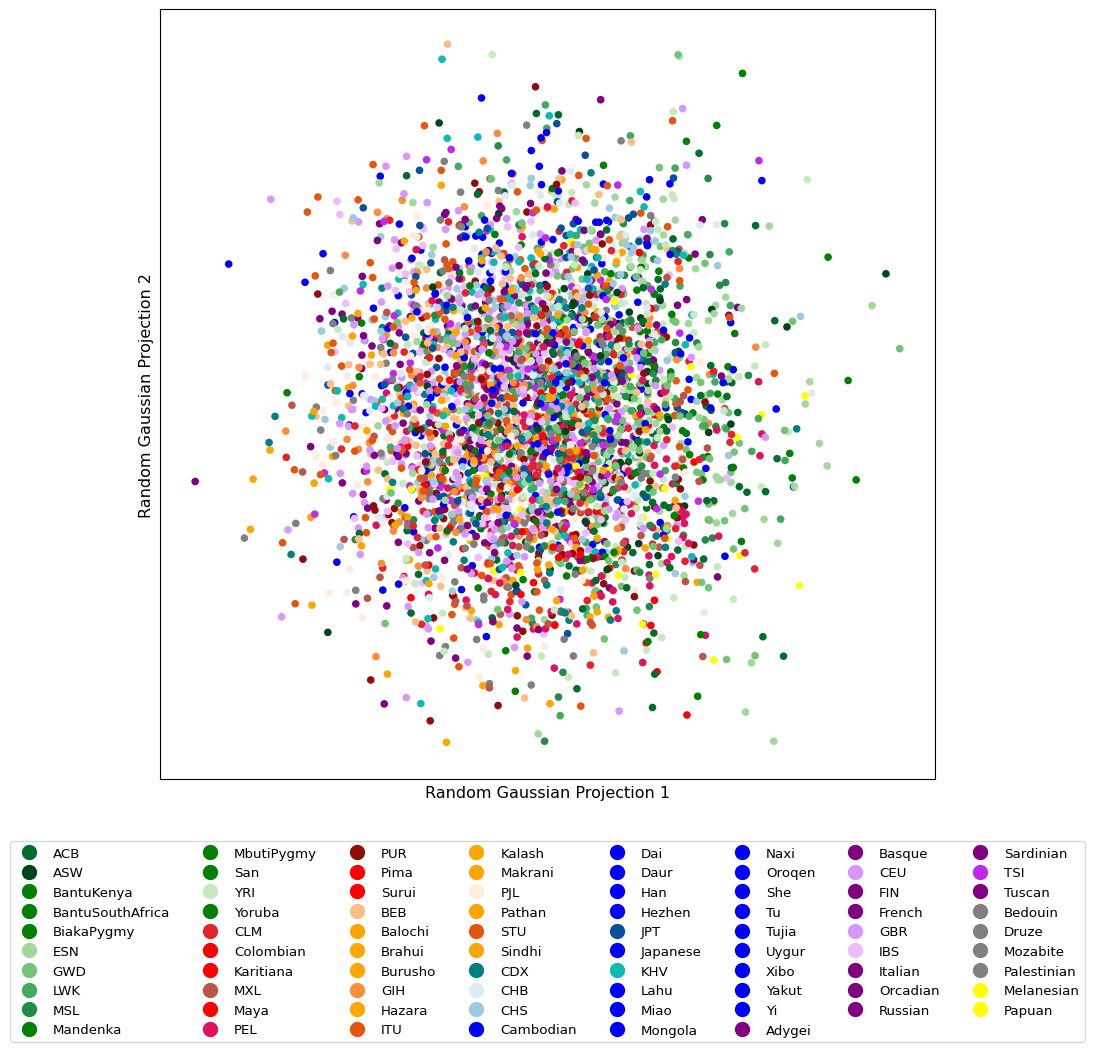

In [19]:
# Sanity test
fig, ax = plt.subplots(figsize=(10, 10))
projector = GaussianRandomProjection(n_components=2, random_state=42)
reduced_genotype_matrix = projector.fit_transform(normalized_matrix)

# PHATE plot
scprep.plot.scatter2d(
    reduced_genotype_matrix[to_fit_on | to_transform_on, :],
    s=20,
    cmap=mapping_info[1],
    ax=ax,
    c=merged_metadata[to_fit_on | to_transform_on]['Population'].values,
    xticks=False,
    yticks=False,
    legend=True,
    legend_loc='lower center',
    legend_anchor=(0.5, -0.35),
    legend_ncol=8,
    label_prefix="Random Gaussian Projection ",
    fontsize=8
)

Running PHATE on 4094 observations and 5 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.06 seconds.
  Calculating affinities...
  Calculated affinities in 0.02 seconds.
Calculated graph and diffusion operator in 0.09 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 0.16 seconds.
  Calculating KMeans...
  Calculated KMeans in 1.28 seconds.
Calculated landmark operator in 2.14 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 0.94 seconds.
Calculating metric MDS...
Calculated metric MDS in 3.94 seconds.
Running PHATE on 4094 observations and 10 variables.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.07 seconds.
  Calculating affinities...
  Calculated affinities in 0.02 seconds.
Calculated graph and diffusion operator in 0.09 seconds.
Calculating landmark operator...
  Calculating SVD...
  Calculated SVD in 

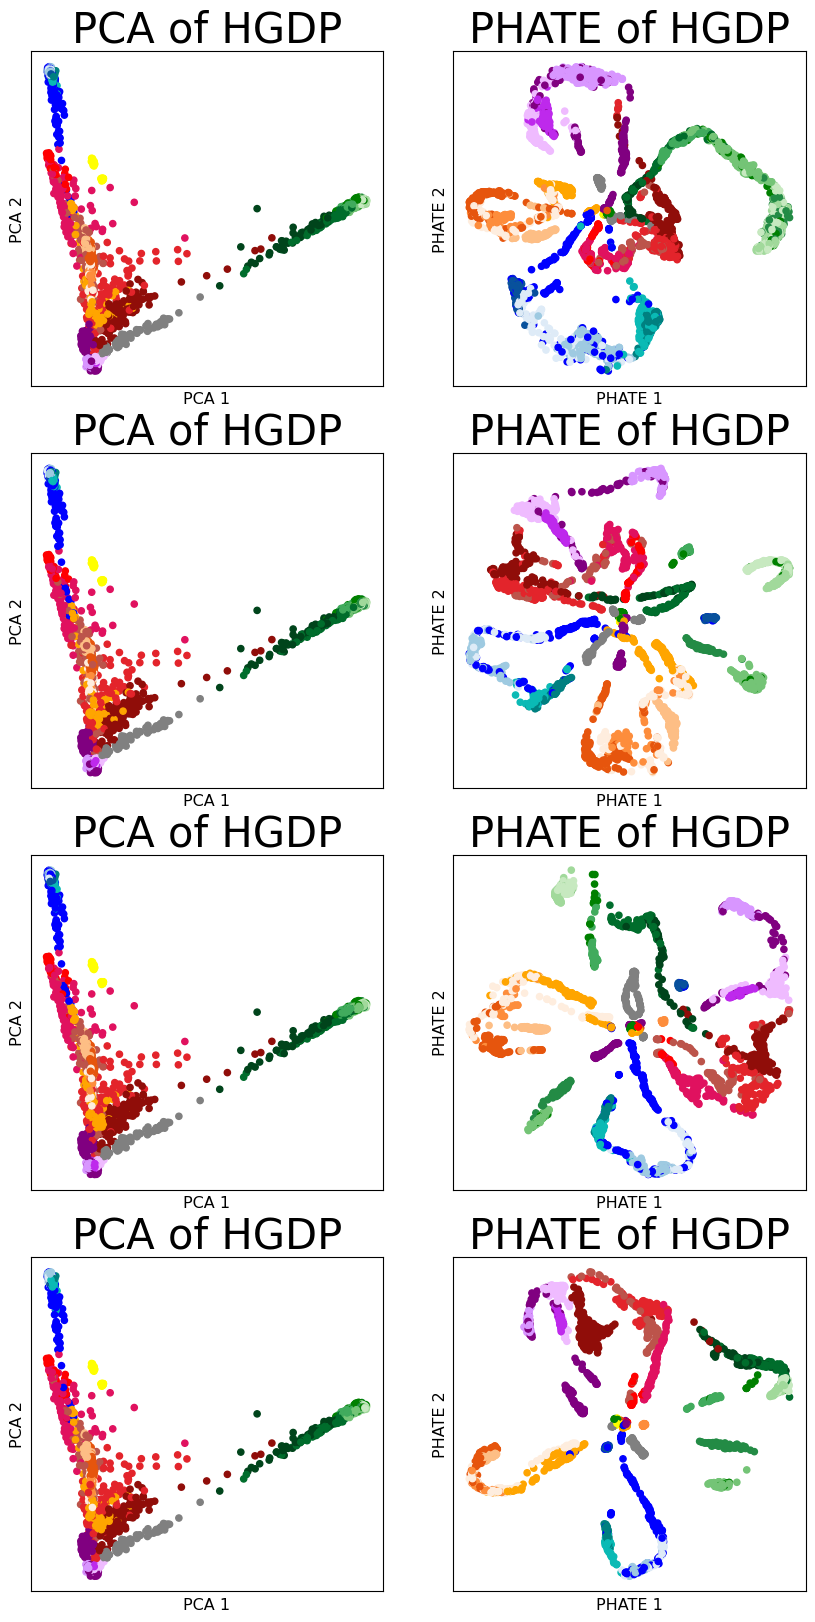

In [21]:
# Try PCA lowpass filter ?
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10, 5*4))

pca_emb, _ = helpers.compute_pca_from_data_matrix(normalized_matrix,
                                                  to_fit_on,
                                                  to_transform_on,
                                                  n_components=50)

for i, n_components in enumerate([5, 10, 25, 50]):

    plot_set = to_fit_on | to_transform_on
    phate_fit_set = phate_trans_set = plot_set

    phate_emb = helpers.compute_phate(pca_emb[:, :n_components], phate_fit_set, phate_trans_set, knn=5, t=5)
    helpers.plot_pca_phate(pca_emb, 
                           phate_emb, 
                           plot_set, 
                           mapping_info[1],
                           merged_metadata['Population'].values,ax[i])